### Question 1.1 (20 points: 5 points for each of the 3 graphs, 5 points for discussion)
Create a CDF where the x-axis is the number of bytes in a flow, and the y-axis is the percentage of flows with that many bytes or less. Make this same plot but for flows transported by UDP and TCP. Provide two observations about trends or patterns you can determine from this graph. Make sure to use logarithmic scales for x-axis and linear scale for y-axis for figures to be clear.

In [4]:
!pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load the data
net_flow = pd.read_csv('netflow.csv')
tcp_flows = net_flow[net_flow['Protocol'] == 'TCP']
udp_flows = net_flow[net_flow['Protocol'] == 'UDP']

udp_bytes_sorted = udp_flows['Bytes'].copy().sort_values()
tcp_bytes_sorted = tcp_flows['Bytes'].copy().sort_values()
all_bytes_sorted = net_flow['Bytes'].copy().sort_values()

In [7]:
def calculate_cdf(data):
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    return sorted_data, y_values

In [8]:
x_all, y_all = calculate_cdf(all_bytes_sorted)
x_tcp, y_tcp = calculate_cdf(tcp_bytes_sorted)
x_udp, y_udp = calculate_cdf(udp_bytes_sorted)

In [9]:
def plot_cdf(x, y, title, linestyle, color):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, drawstyle='steps-post', linestyle=linestyle, color=color)
    plt.xscale('log')
    plt.xlabel('Bytes (log)')
    plt.ylabel('CDF')
    plt.title(title)
    plt.grid(True)
    plt.show()

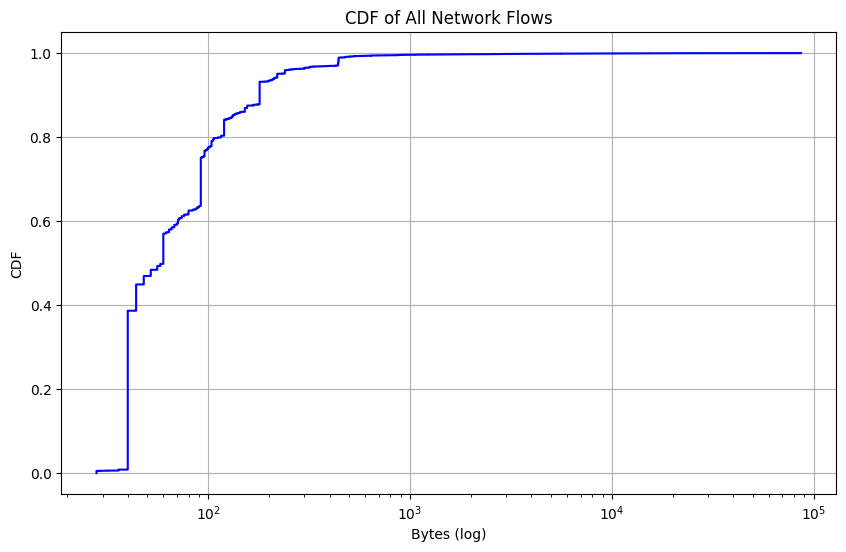

In [10]:
plot_cdf(x_all, y_all, 'CDF of All Network Flows', '-', 'blue')

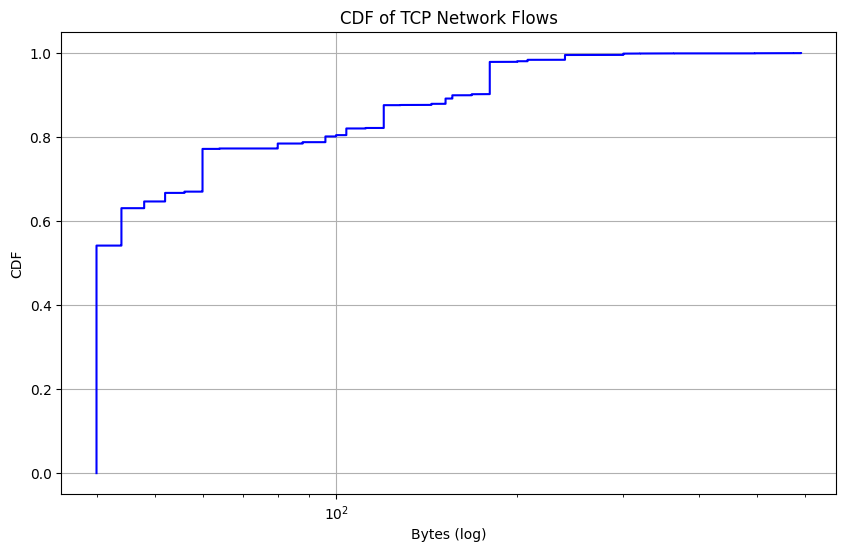

In [15]:
plot_cdf(x_tcp, y_tcp, 'CDF of TCP Network Flows', '-', 'blue')

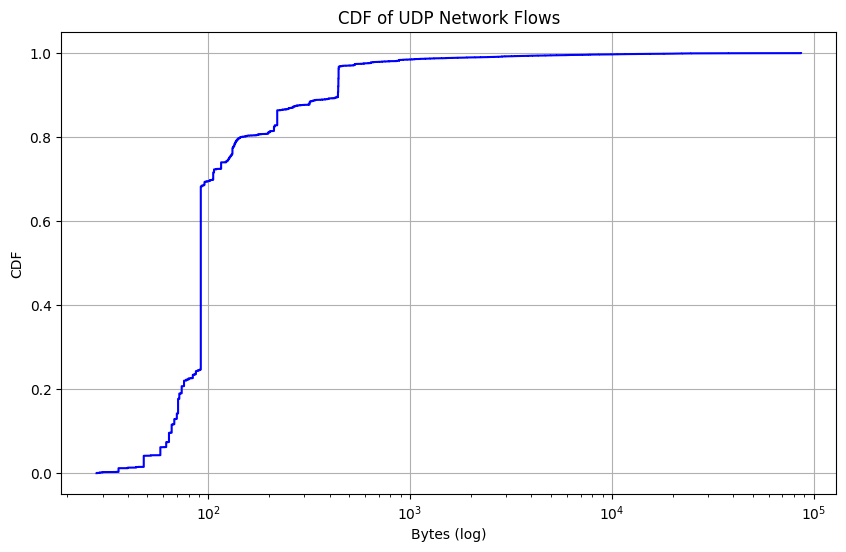

In [9]:
plot_cdf(x_udp, y_udp, 'CDF of UDP Network Flows', '-', 'blue')

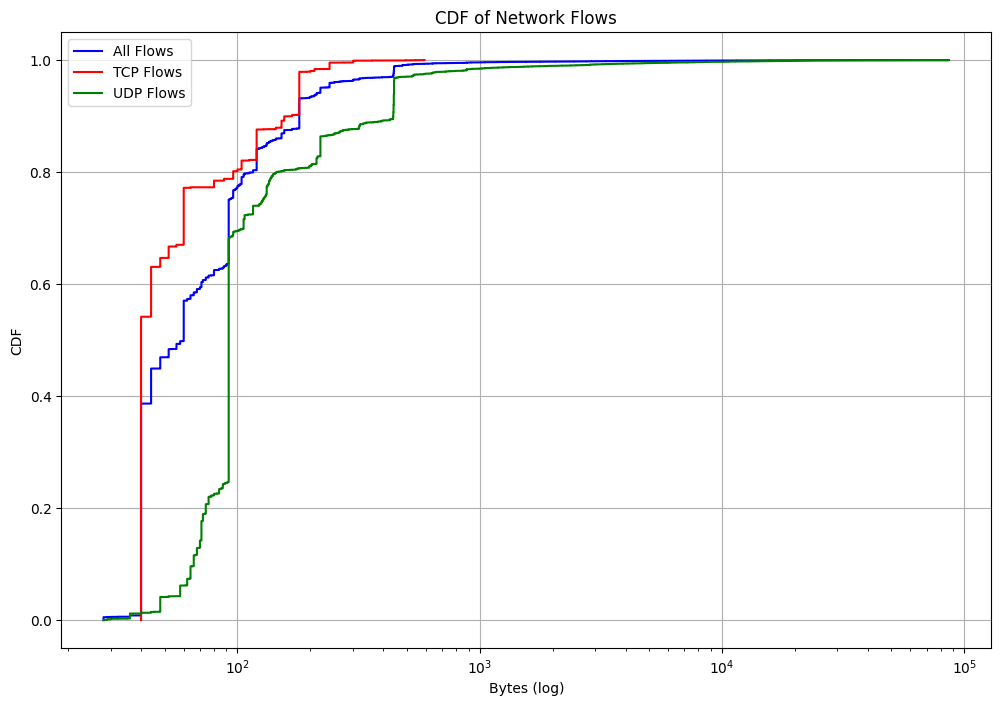

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(x_all, y_all, label='All Flows', drawstyle='steps-post', linestyle='-', color='blue')
plt.plot(x_tcp, y_tcp, label='TCP Flows', drawstyle='steps-post', linestyle='-', color='red')
plt.plot(x_udp, y_udp, label='UDP Flows', drawstyle='steps-post', linestyle='-', color='green')

plt.xscale('log')
plt.xlabel('Bytes (log)')
plt.ylabel('CDF')
plt.title('CDF of Network Flows')
plt.legend()
plt.grid(True)
plt.show()

Observation:
1. TCP flows which is in red line, have a steep increase in the graph and spread in a large range of size which perhaps because TCP is used for a wide range of applications, ranging from small to substantial payloads, such as file transfers, web browsing, and email communication.
2. UDP flows which is in green line is at the higher byte size range, which indicates the UDP flows has larger size， which aligns with the protocol's common use in applications such as online game and video streaming that prioritize smooth, uninterrupted data flow over precise delivery guarantees, necessitating the transmission of larger data packets.

### Question 1.2 
Get the number of flows for each source IP address, only considering its 16-bit prefix (for example: the IP addresses 255.255.0.1 and 255.255.0.2 are counted as there being two 255.255 addresses). What are the top ten IP address prefixes, and what percentage of all the flows recorded are they involved in? (No need to report the percentage per source IP address, just report the aggreagate percentage for top ten source IP addresses.)

In [16]:
def extract_prefix(ip_address):
    parts = ip_address.split('.')  
    first_two_parts = parts[:2]
    prefix = '.'.join(first_two_parts) + '.0.0' 
    return prefix

In [17]:
net_flow['src_prefix'] = net_flow['Src IP addr'].apply(extract_prefix)

In [18]:
grouped_by_prefix = net_flow.groupby('src_prefix').size()
sorted_flows = grouped_by_prefix.sort_values(ascending=False)
top_ten_flows = sorted_flows.head(10)
sum_top_ten_flows = top_ten_flows.sum()
total_flows = sorted_flows.sum()
percentage_top_ten_flows = (sum_top_ten_flows / total_flows) * 100

In [14]:
print("Top ten IP address prefixes ranked by number of flows:")
print(top_ten_flows.to_string())
print(f"Aggregate percentage of flows for the top ten source IP addresses: {percentage_top_ten_flows:.2f}%")

Top ten IP address prefixes ranked by number of flows:
src_prefix
116.211.0.0    17019
169.54.0.0      9424
222.186.0.0     5269
163.53.0.0      2981
169.45.0.0      2494
94.23.0.0       2205
141.212.0.0     2143
212.83.0.0      2042
64.125.0.0      1852
184.105.0.0     1775
Aggregate percentage of flows for the top ten source IP addresses: 44.80%


Now, aggregate the number of bytes by source IP addresses the same way. What are the top ten IP address prefixes in this case, and what percentage of bytes sent across all flows are they responsible for (no need to report the percentage per source IP address, just report the aggreagate percentage for top ten source IP addresses)?

In [19]:
bytes_per_prefix = net_flow.groupby('src_prefix')['Bytes'].sum().sort_values(ascending=False)
top_ten_bytes = bytes_per_prefix.head(10)
percentage_top_ten_bytes = top_ten_bytes.sum() / bytes_per_prefix.sum() * 100

In [16]:
print("\nTop ten IP address prefixes ranked by number of bytes:")
print(top_ten_bytes.to_string())
print(f"Aggregate percentage of bytes for the top ten source IP addresses: {percentage_top_ten_bytes:.2f}%")


Top ten IP address prefixes ranked by number of bytes:
src_prefix
212.83.0.0     928311
169.54.0.0     867928
116.211.0.0    680922
140.205.0.0    510833
128.112.0.0    506604
42.120.0.0     326122
169.45.0.0     229448
222.186.0.0    211068
5.8.0.0        126940
163.53.0.0     120920
Aggregate percentage of bytes for the top ten source IP addresses: 37.41%


### Question 1.3
Pick a port number less than 1024, provide the type of service it's associated with, and report the percentage of flows it appears in as the src port and the percentage of flows it appears in as the dst port.

PORT80: transmit Hypertext Transfer Protocol (HTTP) data.

In [20]:
total_flows = len(net_flow)
src_port_80_flows = len(net_flow[net_flow['Src port'] == 80])
dst_port_80_flows = len(net_flow[net_flow['Dst port'] == 80])
src_port_80_percentage = (src_port_80_flows / total_flows) * 100
dst_port_80_percentage = (dst_port_80_flows / total_flows) * 100

In [18]:
print(f"Percentage of flows where port 80 is src: {src_port_80_percentage:.2f}%")
print(f"Percentage of flows where port 80 is dst: {dst_port_80_percentage:.2f}%")

Percentage of flows where port 80 is src: 3.62%
Percentage of flows where port 80 is dst: 2.41%


### Question 1.4
Observe that this router is responsible for the address block 128.112.0.0/16. What percentage of bytes is sent from this router, and what percentage is sent to this router? What percentage of bytes have a destination and source IP address that are both in this address block? What do these metrics tell you about traffic happening with this router?

In [21]:
def in_subnet(ip, subnet="128.112.0.0/16"):
    import ipaddress
    return ipaddress.ip_address(ip) in ipaddress.ip_network(subnet)

In [22]:
net_flow['src_in_subnet'] = net_flow['Src IP addr'].apply(in_subnet)
net_flow['dst_in_subnet'] = net_flow['Dst IP addr'].apply(in_subnet)

In [23]:
total_bytes = net_flow['Bytes'].sum()
bytes_from_subnet = net_flow[net_flow['src_in_subnet']]['Bytes'].sum()
bytes_to_subnet = net_flow[net_flow['dst_in_subnet']]['Bytes'].sum()
bytes_within_subnet = net_flow[net_flow['src_in_subnet'] & net_flow['dst_in_subnet']]['Bytes'].sum()
percentage_from_subnet = (bytes_from_subnet / total_bytes) * 100
percentage_to_subnet = (bytes_to_subnet / total_bytes) * 100
percentage_within_subnet = (bytes_within_subnet / total_bytes) * 100


In [22]:
print(f"Percentage sent from the subnet: {percentage_from_subnet:.2f}%")
print(f"Percentage sent to the subnet: {percentage_to_subnet:.2f}%")
print(f"Percentage sent and received within the subnet: {percentage_within_subnet:.2f}%")

Percentage sent from the subnet: 4.20%
Percentage sent to the subnet: 95.95%
Percentage sent and received within the subnet: 0.84%


Observation:
1. The percentage of bytes sent from subnet is really low, which indicates that the main work of device in this subset maybe is receive the information or it just contact in the subnet.
2. The percentage of bytes sent to the subnet about 95.95% which indicates that the device in this subnet is the main target of the receving data.
3. Only 0.84% bytes send and received at same time, this percentage 
indicates that there are only relative few device contact with each other.

### Question 1.5
The data you worked with comes from a university's campus, from 6:05 AM to 6:10 AM. What changes would expect in your answers for the previous questions if this data was collected from a router that was serving devices at a busy public cafe during the afternoon? Provide reasons as to why.

The total traffic sum will increase, encompassing both TCP and UDP. Users in cafes may engage more frequently in social media activities such as watching videos or streaming music, potentially leading to an increase in the average size of UDP flows.

The usage of port 80 as both source and destination will likely surge, with the percentage rising significantly. This is because users in busy public cafes may browse websites and access social media platforms more frequently, all of which typically utilize port 80.

The percentage of bytes sent from the subnet is expected to rise, as cafe users may engage in a wider range of activities beyond the subnet. Conversely, the bytes sent into the subnet may decrease, as users may explore a more diverse array of websites rather than concentrating on a single subnet. Additionally, the percentage of bytes both sent and received within the subnet may increase due to the diverse range of network activities taking place in public cafes.


### Question 2.1
From the bgp_route.csv, what are the 10 most frequent ASes in all the BGP paths? What percentage of paths are they found in? Using your favorite browser and search engine, give the name of the AS and the country they belong to (Hint: search for "AS number lookup", give the country's full name). Why might it be problematic for an AS to be commonly found in these routes?

In [24]:
bgp_route = pd.read_csv('bgp_route.csv')

In [25]:
as_list = []
for path in bgp_route['ASPATH']:
    as_list.extend(path.split())

as_counts = pd.Series(as_list).value_counts()
top_as = as_counts.head(10)
top_as_percentage = top_as / len(bgp_route) * 100 


In [26]:
print("Top 10 ASes & frequency:")
print(top_as)
print("\nPercentage of paths they are found in:")
print(top_as_percentage)

Top 10 ASes & frequency:
3356     96296
3257     75208
1299     64901
6939     56839
2914     54805
174      45422
37100    45400
49788    41468
3130     38180
3303     36486
Name: count, dtype: int64

Percentage of paths they are found in:
3356     19.797209
3257     15.461790
1299     13.342804
6939     11.685361
2914     11.267197
174       9.338174
37100     9.333651
49788     8.525283
3130      7.849313
3303      7.501048
Name: count, dtype: float64


## Searching result:
<ol>
<li>3356     LEVEL3, United States </li>
<li>3257     GTT-BACKBONE GTT, United States</li>
<li>1299     TWELVE99 Arelion, fka Telia Carrier, Sweden</li>
<li>6939     HURRICANE, United States</li>
<li>2914     NTT-LTD-2914, United States	</li>
<li>174      COGENT-174, United States</li>
<li>37100    SEACOM-AS, Mauritius</li>
<li>49788    NEXTHOP, Norway</li>
<li>3130     RGNET-SEA RGnet Seattle Westin, Estonia</li>
<li>3303     SWISSCOM Swisscom Switzerland Ltd, Switzerland</li>
</ol>

## potential problem:
When data flow is concentrated through a few AS, any issues within these AS can lead to widespread internet disruptions and performance degradation. Moreover, due to the high dependency on specific AS, the route choices may not be optimal, resulting in reduced efficiency and increased costs. Additionally, frequent appearances of an AS in routing paths can lead to collisions due to inconsistencies in their own policies.

### Question 2.2 
Plot a cumulative distribution function (CDF) where the x-axis is the length of a BGP path and y-axis is the proportion of the paths with that length or less. The length is the number of unique ASes in an entry's ASPATH. What does this graph tell you about BGP route lengths? What does this graph tell you about a packet’s travel across the internet?

In [27]:
def calculate_unique_as_length(aspath):
    as_numbers = aspath.split()
    unique_as_numbers = set(as_numbers)
    return len(unique_as_numbers)

In [28]:
path_lengths = bgp_route['ASPATH'].apply(calculate_unique_as_length)

In [29]:
length_counts = path_lengths.value_counts().sort_index()
cumulative_frequencies = length_counts.cumsum() / path_lengths.count()

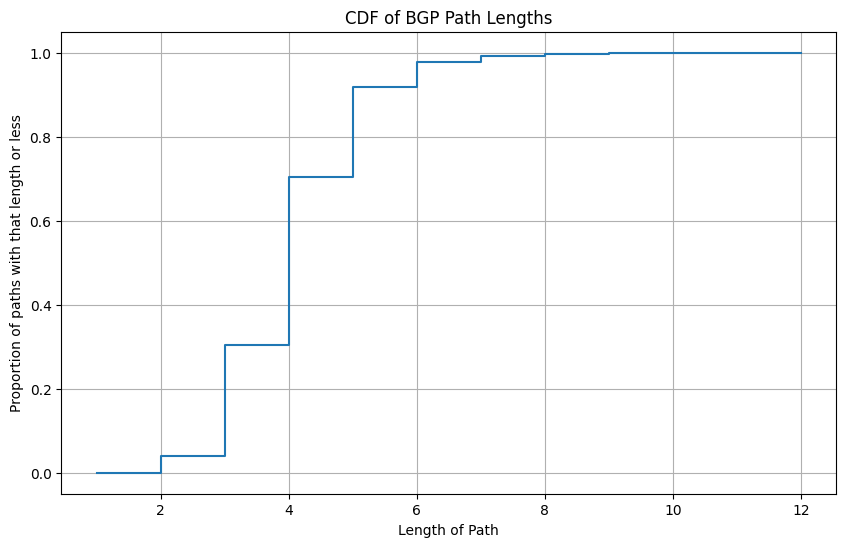

In [29]:
plt.figure(figsize=(10, 6))
plt.step(cumulative_frequencies.index, cumulative_frequencies, where='post')
plt.xlabel('Length of Path')
plt.ylabel('Proportion of paths with that length or less')
plt.title('CDF of BGP Path Lengths')
plt.grid(True)
plt.show()


## about BGP route lengths
From this graph, we can observe that approximately 80% of the paths involve four or fewer AS, with a noticeable sharp increase at four. This suggests that a significant number of paths are concentrated around four AS, indicating a certain degree of network centralization. 

## about a packet’s travel across the internet
The shorter path lengths imply that packets traverse fewer AS before reaching their destination, resulting in fewer hops and faster transmission speeds. Additionally, this might suggest a high dependency on certain AS within the network connections, where any disruptions could significantly impact many data flows.

### Question 2.3
Using bgp_updates.csv, how many BGP updates are done per minute, on average? Make a graph where the x-axis is time and the y-axis is the number of updates at that second.

In [30]:
bgp_updates = pd.read_csv('bgp_update.csv')

In [31]:
def convert_time(time_str):
    time_str = str(time_str)
    minutes, seconds = time_str.split(':')
    if minutes == '00':
        minutes='60'
    seconds, microseconds = seconds.split('.')
    total_seconds = int(minutes) * 60 + int(seconds) 
    return total_seconds 

In [32]:
bgp_updates['TIME_SECONDS'] = bgp_updates['TIME'].apply(convert_time)

updates_per_second = bgp_updates.groupby(bgp_updates['TIME_SECONDS']).size()

total_updates = updates_per_second.sum()
print('Total number of BGP updates:', total_updates)

Total number of BGP updates: 166259


In [33]:

total_seconds = bgp_updates['TIME_SECONDS'].max() - bgp_updates['TIME_SECONDS'].min()
print(f"Total seconds: {total_seconds}")

Total seconds: 900


In [34]:
average_updates_per_minute = total_updates/total_seconds * 60
print('Average BGP updates per minute:', average_updates_per_minute)

Average BGP updates per minute: 11083.933333333332


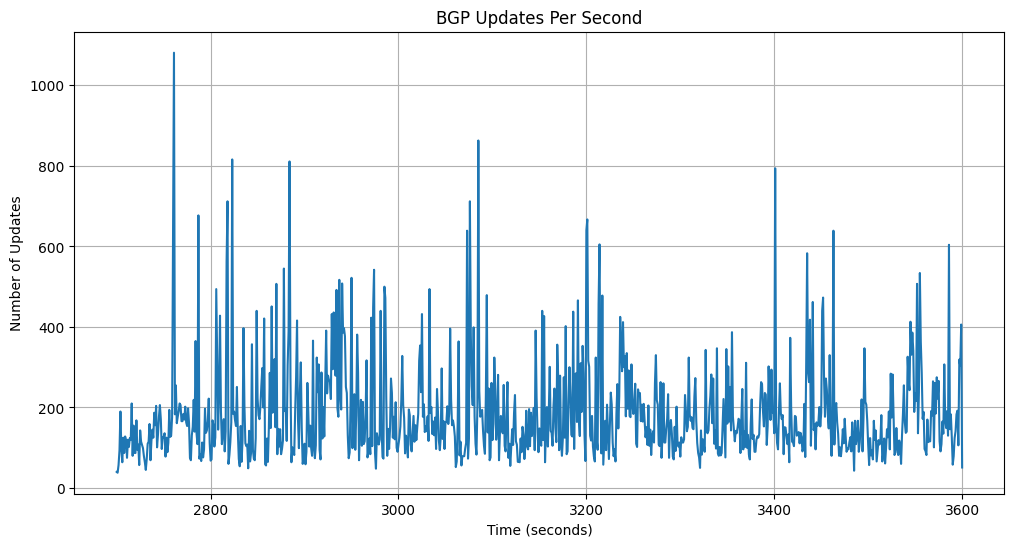

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(updates_per_second.index, updates_per_second.values)
plt.title('BGP Updates Per Second')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Updates')
plt.grid(True)
plt.show()

### Question 2.4
Plot a CDF where the x-axis is the top percentage of ASes by the number of updates and the y-axis is the percentage of updates messages that are from that top percentage. Include all ASes from bgp_route.csv, not just the bgp_update.csv. Make sure to use logarithmic scales for graph axes if the distribution is not clear. What can you infer about the ASes tracked here, specifically about their stability?

In [36]:
def extract_as_numbers(aspath):
    if pd.isna(aspath):
        return []
    return aspath.split()

In [37]:
bgp_route['AS_LIST'] = bgp_route['ASPATH'].apply(extract_as_numbers)
bgp_updates['AS_LIST'] = bgp_updates['ASPATH'].apply(extract_as_numbers)

In [38]:
route_exploded = bgp_route.explode('AS_LIST')
update_exploded = bgp_updates.explode('AS_LIST')
total_as = pd.concat([route_exploded['AS_LIST'], update_exploded['AS_LIST']]).dropna()

In [39]:
updates_num= total_as.value_counts()
updates_sum = updates_num.cumsum()
total_update = updates_num.sum()
update_percent = updates_sum / total_update

rank_percent = np.linspace(0, 100, len(updates_sum))

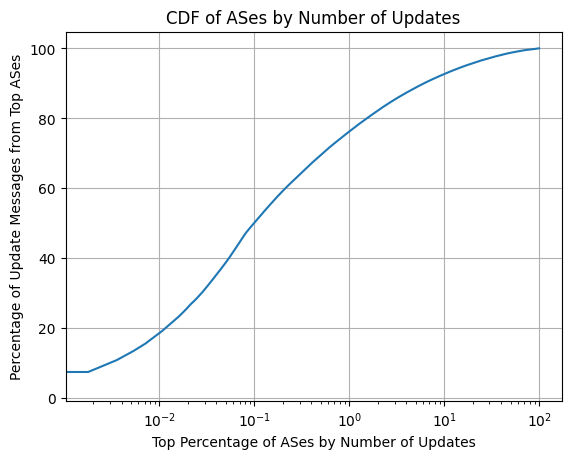

In [47]:
# plt.figure(figsize=(8, 5))
plt.plot(rank_percent, update_percent * 100)
plt.xscale('log')  
# plt.xlim([10**-2, 10**0]) 
plt.xlabel('Top Percentage of ASes by Number of Updates')
plt.ylabel('Percentage of Update Messages from Top ASes')
plt.title('CDF of ASes by Number of Updates')
plt.grid(True)
plt.show()



The graph indicates a small fraction of ASes is responsible for a large portion of update messages. Specifically, the top 10% of ASes are responsible for more than 60% of update messages, and approximately 1% of ASes contribute up to 20%. This suggests a high level of centralization in BGP updates.

In terms of network stability, this implies that a few ASes might be changing their routes quite frequently, which can reflect an unstable network condition. A small change in these ASes' routing policies or network configurations can potentially trigger a disproportionately large number of BGP updates. 

The graph also shows that the rate of increase in update contributions slows down as we look at a larger percentage of ASes, indicating that the remaining ASes contribute relatively fewer updates. This can also be interpreted as the BGP update process being dominated by a minority of the ASes, potentially leading to greater vulnerability to network disruptions if these key ASes experience issues. 